In [3]:
import pandas as pd
import numpy as np
import json
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

from utils_plotting import val_map, display_dict
from utils_scaling import fit, plot_contours

import jax.numpy as jnp

In [4]:
# df = pd.read_csv("data/temp.csv")
df_big = pd.read_csv("data/extrapolation.csv")

In [ ]:
def get_data(drop_df, key = "train/CrossEntropyLoss"):
    drop_df = drop_df.dropna(subset=[key])

    N = jnp.array(drop_df["params"], dtype=jnp.float32)
    D = jnp.array(drop_df["tokens"], dtype=jnp.float32)
    L = jnp.array(drop_df[key], dtype=jnp.float32)
    return N, D, L

In [5]:
# formats = [ "fp4_e2m1", "float16", "fp16", "fp8_e5m2", "fp8_e4m3", "fp6_e3m2", "fp6_e2m3", "fp4", "int8", "int4"]

formats = ["fp6_e2m3", "fp6_e3m2", "fp8_e4m3", "fp8_e5m2", "bfloat16"]

In [ ]:
plot_params_df = pd.DataFrame()
for kaplan in [True, False]:
    fig, axs = plt.subplots(5, 5, figsize=(25, 25))
    fig.subplots_adjust(hspace=0.3, wspace=0.5)
    sns.set(style="whitegrid")
    axs = axs.flatten()
    for i, w_format in enumerate(formats):
        for j, a_format in enumerate(formats):
            
            for loss_name in ["val_loss"]:
                ax = axs[i * len(formats) + j]
                print(f"w_format = {w_format}, a_format = {a_format}")

                # drop_df = df[df["data"] == data]
                try: 
                    drop_df = pd.read_csv(f"data/{w_format}_{a_format}.csv")
                    # drop_df = df[(df["model.w_mx_format"] == w_format) & (df["model.a_mx_format"] == a_format)]
                
                    N, D, L = get_data(drop_df, loss_name)

                    params, _ = fit(N, D, L, kaplan=kaplan)
                    print(f"Loss: {params['loss']}")

                # df_big_data = df_big[(df_big["model.w_mx_format"] == w_format) & (df_big["model.a_mx_format"] == a_format)]
                # x = np.array(df_big_data["iso_flop"])
                # y = np.array(df_big_data["params"])
                # z = np.array(df_big_data["val_loss"])
                # extrapolation = (x,y,z)
                    extrapolation = None
                    masks = np.ones(5)
                    vals = np.zeros(5)
                    plot_contours(ax, N, D, L, params, masks, vals, extrapolation, kaplan=kaplan)
                    ax.set_title(f"{w_format}_{a_format}")

                    params["kaplan"] = kaplan
                    params["w_format"] = w_format
                    params["a_format"] = a_format

                    params = pd.DataFrame([params.values], columns=params.index, index = [i])
                    plot_params_df = pd.concat([plot_params_df, params])
                
                except: pass

    plt.savefig(f"figures/all_curves_{'kaplan' if kaplan else 'chinchilla'}.pdf", bbox_inches='tight')
    plt.show()

w_format = fp6_e2m3, a_format = fp6_e2m3


Loss: 1.8478340513532693e-05
A = 4527423.929992861, B = 121014988.19576247, E = 0.5834257616357199, alpha = 0.5107687834455504, beta = 0.7619688034983187
G = 0.00016034273552434087, a = 0.5986849224182795, b = 0.40131507758172036
w_format = fp6_e2m3, a_format = fp6_e3m2
Loss: 1.178640250221853e-05
A = 2863963.1641027224, B = 94753066.04183452, E = 0.6786402476189805, alpha = 0.4663845278512601, beta = 1.695022336194861
G = 1.736227850842775e-07, a = 0.7842217790600539, b = 0.21577822093994614
w_format = fp6_e2m3, a_format = fp8_e4m3
Loss: 2.8204835987827398e-05
A = 2158907.646875029, B = 59058919.00372208, E = 0.7450903554737325, alpha = 0.5057065914569998, beta = 4.526512570455398
G = 9.649758991799192e-09, a = 0.8995062466109255, b = 0.10049375338907453
w_format = fp6_e2m3, a_format = fp8_e5m2
Loss: 2.291670829355475e-05
A = 2495130.2682482474, B = 87779784.92034173, E = 0.6800071119544098, alpha = 0.4398818222345463, beta = 1.986987663897479
G = 6.575713109067074e-08, a = 0.81874516

w_format = fp8_e4m3, a_format = bfloat16
Loss: 8.606554362936132e-06
A = 2822.480604261686, B = 20445.40765376697, E = 0.5353079817554266, alpha = 0.5236196803588452, beta = 0.5533511883618424
G = 0.15108661613327015, a = 0.5138033018656831, b = 0.48619669813431693


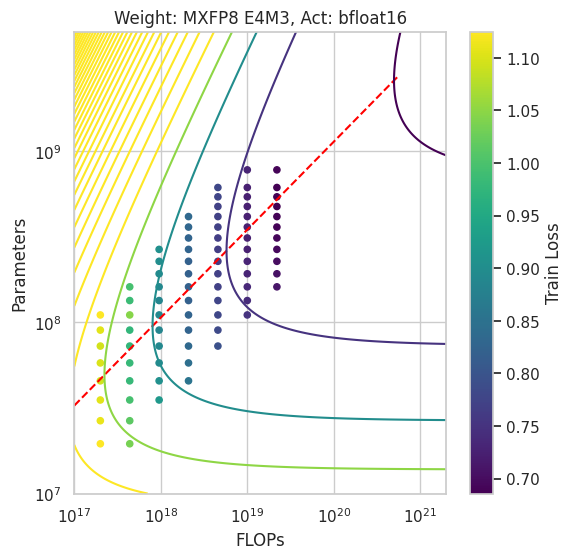

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plot_params_df = pd.DataFrame()
sns.set(style="whitegrid")

kaplan = False

# Replace with your actual formats
w_format = 'fp8_e4m3'
a_format = 'bfloat16'

# Create a single figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

for loss_name in ["min_val_loss"]:
    print(f"w_format = {w_format}, a_format = {a_format}")
    try:
        df = pd.read_csv(f"data/{w_format}_{a_format}.csv")
        
        N, D, L = get_data(df, loss_name)
        params, _ = fit(N, D, L, kaplan=False)
        print(f"Loss: {params['loss']}")

        extrapolation = None
        masks = np.ones(5)
        vals = np.zeros(5)

        # Use the single ax
        plot_contours(ax, N, D, L, params, masks, vals, extrapolation, kaplan=kaplan)

        # ax.set_title(f"{w_format}_{a_format}")
        # ax.set_title('Weight: MXFP8 E4M3, Act: MXFP8 E4M3, Quantize Forward Only')
        # ax.set_title('Weight: MXFP6 E2M3, Act: MXFP6 E2M3')
        ax.set_title('Weight: MXFP8 E4M3, Act: bfloat16')

        params["kaplan"] = kaplan
        params["w_format"] = w_format
        params["a_format"] = a_format

        params = pd.DataFrame([params.values], columns=params.index)
        plot_params_df = pd.concat([plot_params_df, params])

    except Exception as e:
        print(f"Error: {e}")

# Save and show
plt.savefig(f"figures/curves_{'kaplan' if kaplan else 'chinchilla'}.pdf", bbox_inches='tight')
plt.show()

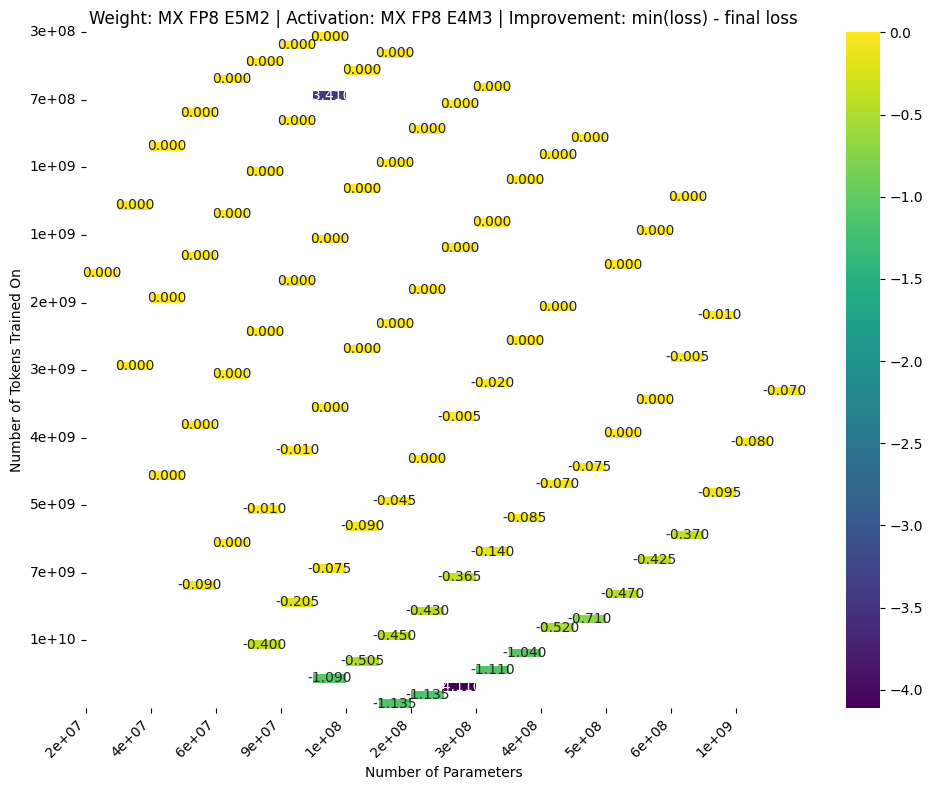

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Load data
w_format = 'fp8_e5m2'
a_format = 'fp8_e4m3'
df = pd.read_csv(f'data/{w_format}_{a_format}.csv')

# Get processed values
N, D, min_val_losses = get_data(df, "min_val_loss")
_, _, val_losses = get_data(df, "val_loss")
improvement = min_val_losses - val_losses

# Create DataFrame
df_improve = pd.DataFrame({
    'num_params': N,
    'num_tokens': D,
    'improvement': improvement
})

# Sort axes numerically before pivoting
unique_tokens = sorted(df_improve['num_tokens'].unique())
unique_params = sorted(df_improve['num_params'].unique())

# Pivot to 2D matrix for heatmap
heatmap_data = df_improve.pivot_table(
    index='num_tokens', columns='num_params', values='improvement'
).reindex(index=unique_tokens, columns=unique_params)

# Plot
plt.figure(figsize=(10, 8))
ax = sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap='viridis')

# Format tick labels with scientific notation
def sci_fmt(x, _): return f'{x:.0e}'

# Set custom x-axis labels in scientific notation
num_xticks = 10  # You can adjust this value as needed
x_ticks = range(0, len(heatmap_data.columns), len(heatmap_data.columns) // num_xticks if len(heatmap_data.columns) > num_xticks else 1)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'{col:.0e}' for col in heatmap_data.columns[x_ticks]], rotation=45, ha='right')

# Adjust y-axis ticks to avoid repetition
num_yticks = 10  # You can adjust this value as needed
y_ticks = range(0, len(heatmap_data.index), len(heatmap_data.index) // num_yticks if len(heatmap_data.index) > num_yticks else 1)
ax.set_yticks(y_ticks)
ax.set_yticklabels([f'{idx:.0e}' for idx in heatmap_data.index[y_ticks]], rotation=0)

plt.title(f'Weight: MX {w_format.upper().replace("_", " ")} | Activation: MX {a_format.upper().replace("_", " ")} | Improvement: min(loss) - final loss')
plt.xlabel('Number of Parameters')
plt.ylabel('Number of Tokens Trained On')
plt.tight_layout()
plt.savefig(f"figures/min_loss_improvement.pdf", bbox_inches='tight')
plt.show()

In [7]:
# latex tabel of params
for kaplan in [True, False]:
    for i, data in enumerate(val_map.keys()):
        a, b, e, alpha, beta = plot_params_df[(plot_params_df["data"] == data) & (plot_params_df["kaplan"] == kaplan)].values[0][:5]
        print(f"{display_dict[data]} & {a:.2e} & {b:.2e} & {e:.2f} & {alpha:.2f} & {beta:.2f} & {beta / (alpha + beta):.2f} \\\\")
    print()

KeyError: 'data'

In [ ]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import glob
import math

from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.image as mpimg
import matplotlib.cm as cm
%matplotlib inline

In [ ]:
window_size = 100

def moving_average(x, window_size=window_size):
    return np.convolve(x, np.ones(window_size)/window_size, mode='valid')


def find_sign_change_step(steps, values):
    # Compute numerical derivative
    derivatives = np.diff(values)
    signs = np.sign(derivatives)

    # Look for sign changes
    for i in range(1, len(signs)):
        if signs[i] != 0 and signs[i] != signs[i - 1]:
            return steps[i + window_size - 1]  # Adjust index because of moving average window
    return None


def find_large_positive_derivative_step(steps, values, threshold=0.008):
    derivatives = np.diff(values)
    for i, d in enumerate(derivatives):
        if d > threshold:
            return float(steps[i + 1])
    return None

In [ ]:

ratios = {}
ratios['fp6_e2m3_fp6_e3m2'] = [9.73842, 16.23425, 62.08117, 83.29887, 113.2144, 156.01372]
ratios['fp6_e3m2_fp6_e3m2'] = [42.36739, 62.40892, 93.80541, 144.13805]
# ratios['fp8_e4m3_fp8_e4m3'] = [42.36739, 62.40892, 93.80541, ]

In [ ]:
choice = 'fp6_e2m3_fp6_e3m2'
csv_files = glob.glob(f"data/training_loss/{choice}/*.csv")  

In [ ]:
results = []

plt.figure(figsize=(10, 6))
for idx, file in enumerate(sorted(csv_files)):
    df = pd.read_csv(file)

    step_col = "Step"
    loss_col = [col for col in df.columns if "CrossEntropyLoss" in col and "__" not in col][0]

    steps = df[step_col].astype(float).values
    losses = df[loss_col].astype(float).values
    print(losses)
    smoothed = moving_average(losses, window_size)
    print('smoothed', smoothed)
    smoothed_steps = steps[window_size - 1:]  # Align with moving average

    sign_change_step = find_large_positive_derivative_step(smoothed_steps, smoothed)
    results.append(sign_change_step)

    label = f"Run {idx + 1}"
    plt.plot(smoothed_steps, smoothed, label=label)

plt.legend()

In [ ]:

plt.figure(figsize=(6, 4))
plt.plot(ratios[choice], results, marker='o')
plt.xticks(ratios[choice])
plt.xlabel("Ratio")
plt.ylabel("First Sign Change Step")
plt.title("First Derivative Sign Change Step per Run")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
choice = 'fp6_e2m3_fp6_e3m2'
csv_files = glob.glob(f"data/grad_norm/{choice}/*.csv")  

In [ ]:

def moving_average(series, window=50):
    return series.rolling(window=window, min_periods=1).mean()

def numerical_derivative(series):
    return series.diff().fillna(0)

# where derivative changes sign, ignoring first X steps
def find_sign_changes(series, ignore_initial=120):
    derivative_sign = np.sign(series)
    sign_changes = derivative_sign.diff().fillna(0).ne(0)
    sign_change_indices = sign_changes[ignore_initial:].index[sign_changes[ignore_initial:]].tolist()
    return sign_change_indices

In [ ]:
results = []
colors = cm.get_cmap('tab10', len(csv_files))

plt.figure(figsize=(10, 6))
for idx, file in enumerate(sorted(csv_files)):
    df = pd.read_csv(file)

    step_col = "Step"
    # loss_col = [col for col in df.columns if "CrossEntropyLoss" in col and "__" not in col][0]
    # losses = df[loss_col].astype(float).values
    smoothed_grad_norm = moving_average(df[f'{choice} - optim/total_grad_norm'])
    # smoothed = moving_average(losses, window_size)
    grad_norm_derivative = numerical_derivative(smoothed_grad_norm)
    sign_changes = find_sign_changes(grad_norm_derivative)

    label = f"Run {idx + 1} Ratio {ratios[choice][idx]}"
    color = colors(idx)
    plt.plot(smoothed_grad_norm, label=label, color=color)

    if sign_changes:
        first_change = sign_changes[0]
        plt.axvline(x=first_change, color=color, linestyle='--', alpha=0.5)
        plt.text(first_change, max(smoothed_grad_norm) * 0.9, f'SC {idx+1}', rotation=90, color=color, fontsize=8)

    results.append(sign_changes[0])
    # plt.plot(sign_changes, smoothed, label=label)

plt.legend()

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(ratios[choice], results, marker='o')
plt.xticks(ratios[choice])
plt.xlabel("Ratio")
plt.ylabel("First Sign Change Step")
plt.title("First Derivative Sign Change Step per Run")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:

# var(grad_norm) vs. t
K = 100  # Window size for variance
# steps = df["Step"].values
# grad_norms = df[f"{choice} - optim/total_grad_norm"].astype(float).values

# Compute rolling variance
# rolling_var = pd.Series(grad_norms).rolling(window=K).var().values

# Mask the first K-1 values since they will be NaN
# valid_steps = steps[K-1:]
# valid_vars = rolling_var[K-1:]
choices = ['fp6_e2m3_fp6_e3m2', 'fp8_e5m2_fp8_e5m2', 'fp6_e2m3_fp6_e2m3']

# loss_csv_files = sorted(glob.glob(f"data/training_loss/{choice}/*.csv")  )
ncols = 3
nrows = 1 # math.ceil(len(grad_csv_files) / ncols)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 4 * nrows))
plt.subplots_adjust(hspace=0.4)

# Flatten axes for easy indexing
axes = axes.flatten()

for i, c in enumerate(choices):
    df_grad = pd.read_csv(f"data/same_FLOPs_ratio/{c}.csv")

    # Extract step and values
    grad_steps = df_grad["Step"].astype(int).values
    grad_norms = df_grad[f'{c} - optim/total_grad_norm'].astype(float).values

    # Compute rolling variance
    grad_var = pd.Series(grad_norms).rolling(window=K).var().values
    # valid = ~np.isnan(grad_var)
    grad_steps_valid = grad_steps[K-1:]
    grad_var_valid = grad_var[K-1:]


    # Plot in log-log scale
    ax = axes[i]
    # ax.loglog(x_vals, y_vals, 'o', markersize=3, alpha=0.7)
    ax.plot(grad_steps_valid, grad_var_valid, label=f'Rolling Variance (K={K})', color='blue')
    ax.set_title(f"{c}")
    ax.set_xlabel("t")
    ax.set_ylabel("Grad Norm Var")
    ax.grid(True, which='both', ls='--', linewidth=0.5)
    ax.set_ylim(-0.1, 6)  # Apply same y-limits

    inset_ax = inset_axes(ax, width="30%", height="30%", loc='upper left', borderpad=2)
    inset_ax.plot(grad_steps, grad_norms, color='orange')
    inset_ax.set_title("Grad Norm", fontsize=8)
    inset_ax.tick_params(labelsize=6)
    inset_ax.set_ylim(-0.1, 15)  # Apply same y-limits


Failed to get history for run ukp6ynn0: '_step'
Failed to get history for run rk8fhple: '_step'
Train loss data extracted for all runs.


/tmp/ipykernel_1595832/2353684589.py:51: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("viridis")


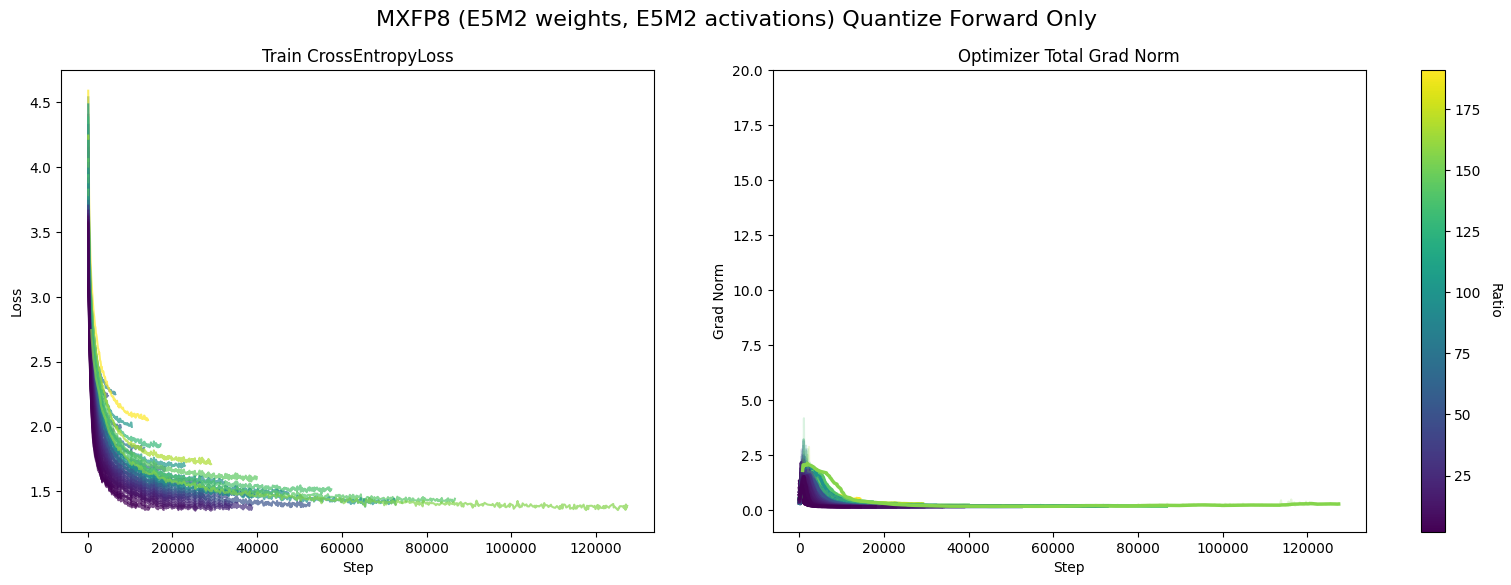

In [13]:
import wandb
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np

entity = "harvardml"
project = "test-precision-MX-fineweb"
project = "quantize-fwd-only-MX-fineweb"

api = wandb.Api()

prefix = "fp8_e5m2_fp8_e5m2"
# prefix = "fp32_fp32"
runs = api.runs(f"{entity}/{project}",
                filters={"display_name": {"$regex": f"^{prefix}"}}
                )

all_data = []

for run in runs:
        try:
            history = run.history(
                keys=["train/CrossEntropyLoss", "optim/total_grad_norm"], 
                pandas=True,
            )
            
            all_data.append({
                "run_id": run.id,
                "run_name": run.name,
                "ratio": run.config.get("ratio", None),
                "steps": history["_step"].tolist(),
                "loss_curve": history["train/CrossEntropyLoss"].tolist(),
                "grad_norm_curve": history["optim/total_grad_norm"].tolist()
            })
        except Exception as e:
            print(f"Failed to get history for run {run.id}: {e}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
# fig.suptitle(f"{prefix}: Train Loss & Total Grad Norm Colored by Ratio", fontsize=16)
fig.suptitle('MXFP8 (E5M2 weights, E5M2 activations) Quantize Forward Only', fontsize=16)
# fig.suptitle('MXFP6 E2M3 weights, MXFP8 E4M3 activations', fontsize=16)
# fig.suptitle('bfloat16 weights, bfloat16 activations', fontsize=16)

ratios = [df["ratio"] for df in all_data]
min_ratio, max_ratio = min(ratios), max(ratios)

normalize = lambda r: (r - min_ratio) / (max_ratio - min_ratio + 1e-8)  # +eps to avoid /0

cmap = cm.get_cmap("viridis")
for df in all_data:
        ratio = df["ratio"]
        color = cmap(normalize(ratio))

        steps = df["steps"]
        ax1.plot(steps, df["loss_curve"], label=df["run_name"], color=color, alpha=0.7, linewidth=1.5)

        grad_norm = np.array(df["grad_norm_curve"])
        ax2.plot(steps,df["grad_norm_curve"], label=df["run_name"], color=color, alpha=0.2, linewidth=1.5)

        # print(len(grad_norm))
        # if len(grad_norm) > 0:
        window = max(1, len(grad_norm) // 20)
        grad_smooth = pd.Series(grad_norm).rolling(window=window, min_periods=1).mean()
        ax2.plot(steps, grad_smooth, color=color, alpha=1.0, linewidth=2.5)

ax1.set_title("Train CrossEntropyLoss")
ax2.set_title("Optimizer Total Grad Norm")
ax1.set_xlabel("Step")
ax2.set_xlabel("Step")
ax1.set_ylabel("Loss")
ax2.set_ylabel("Grad Norm")
ax2.set_ylim(top=20)
ax2.set_ylim(bottom=-1)
norm = mcolors.Normalize(vmin=min_ratio, vmax=max_ratio)
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=[ax1, ax2], orientation='vertical', fraction=0.025, pad=0.04)
cbar.set_label("Ratio", rotation=270, labelpad=15)

print("Train loss data extracted for all runs.")

plt.savefig(f"figures/curves.pdf", bbox_inches='tight')
plt.show()

In [ ]:
def get_val_loss(runs):
    all_data = []

    for run in runs:
        try:
            history = run.history(
                keys=["eval/fineweb_nikhil_val/CrossEntropyLoss"], 
                pandas=True,
            )
            
            all_data.append({
                "run_id": run.id,
                "run_name": run.name,
                "flops": run.config.get("total_flops", None),
                "ratio": run.config.get("ratio", None),
                "final_loss": history["eval/fineweb_nikhil_val/CrossEntropyLoss"].tolist()[-1]
            })
        except Exception as e:
            print(f"Failed to get history for run {run.id}: {e}")

    return all_data

In [ ]:
import wandb
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np

entity = "harvardml"
api = wandb.Api()

runs_full_precision = api.runs(f"{entity}/test-precision-MX-fineweb",
                filters={"display_name": {"$regex": f"^fp32_fp32"}}
                ) 
print(len(runs_full_precision))
data_full_precision = get_val_loss(runs_full_precision)
print(data_full_precision)

runs_fix1 = api.runs(f"{entity}/test-precision-MX-fineweb",
                filters={"display_name": {"$regex": f"^fp8_e4m3_bfloat16"}}
                ) 
print(len(runs_fix1))
data_fix1 = get_val_loss(runs_fix1)
print(data_fix1)
    
runs_fix2 = api.runs(f"{entity}/quantize-fwd-only-MX-fineweb",
                filters={"display_name": {"$regex": f"^fp8_e4m3_fp8_e4m3"}}
                ) 
print(len(runs_fix2))
data_fix2 = get_val_loss(runs_fix2)

In [ ]:
with open("output.txt", "w") as f:
    for d in data_full_precision:
        ratio = d["ratio"]
        d1 = next((d1 for d1 in data_fix1 if d1["ratio"] == ratio), None)
        d2 = next((d2 for d2 in data_fix2 if d2["ratio"] == ratio), None)

        if d1 is not None and d2 is not None:
            line = f"{ratio} {d['flops']} {d['final_loss']} {round(d['final_loss'] - d1['final_loss'], 3)} {round(d['final_loss'] - d2['final_loss'], 3)}\n"
            f.write(line)

In [ ]:
# losses: list of np.arrays, each representing training loss over time for one D/N
# grad_norms: list of np.arrays, each representing grad norm over time for one D/N
# time: np.array of time steps (shared across all curves)


time = np.linspace(0, 1000, 200)  # Assume 200 time steps

# Generate dummy data (replace with your actual data)
np.random.seed(0)
losses = [np.exp(-time / (100 * (d_n + 0.5))) + 0.05 * np.random.randn(len(time)) for d_n in D_N_ratios]
grad_norms = [1 / (1 + np.exp(-(time - 500) / (50 * (d_n + 0.5)))) + 0.1 * np.random.randn(len(time)) for d_n in D_N_ratios]

# Define a colormap
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(D_N_ratios)))

# Plot
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

# Left subplot: Training Loss
for i, (loss, d_n) in enumerate(zip(losses, D_N_ratios)):
    axs[0].plot(time, loss, label=f'D/N={d_n}', color=colors[i])
axs[0].set_title('Unstable FP8 Training Loss')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Right subplot: Gradient Norms
for i, (grad, d_n) in enumerate(zip(grad_norms, D_N_ratios)):
    axs[1].plot(time, grad, label=f'D/N={d_n}', color=colors[i])
axs[1].set_title('Gradient Norm Over Time')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Gradient Norm')
axs[1].legend()

plt.tight_layout()
plt.show()